# Keras Regression Code Along Project 

This Project will be focus on feature engineering and cleaning our data with realistic data set!

## The Data

Source: Kaggle

https://www.kaggle.com/harlfoxem/housesalesprediction

####  Columns feature:
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [149]:
# Let's look at data head
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [150]:
#Check if data is missing
#df.isnull()
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [151]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


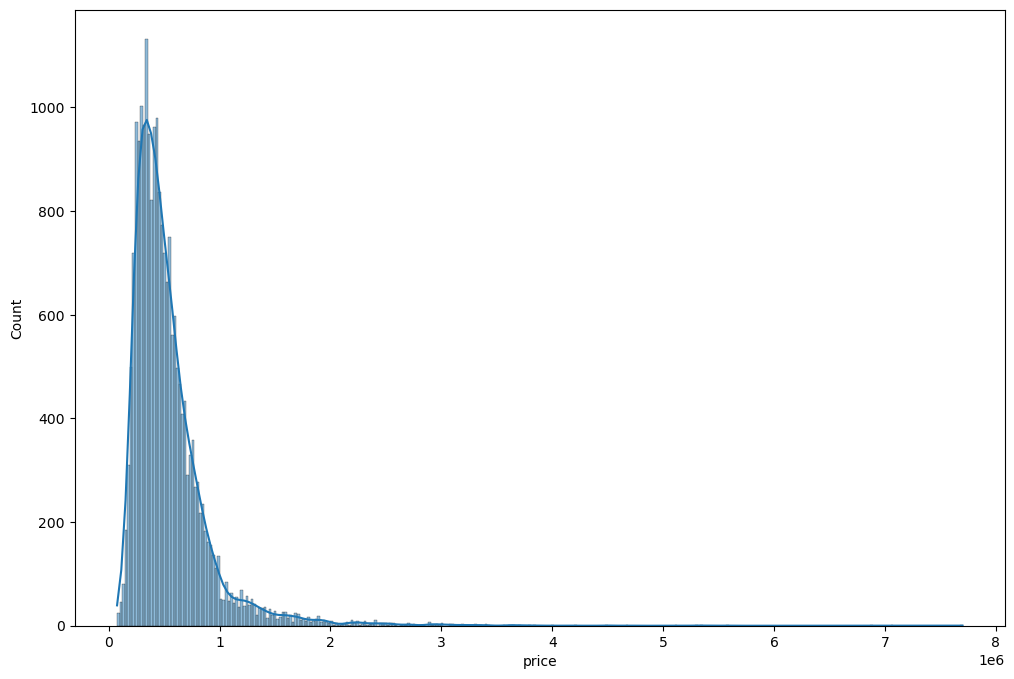

In [152]:
# Let's quick look at the price
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='price', kde=True)
plt.show()

We may consider removing the extreme outliers originating from expensive houses, as they might not contribute significantly to the model's training and could potentially distort the results.

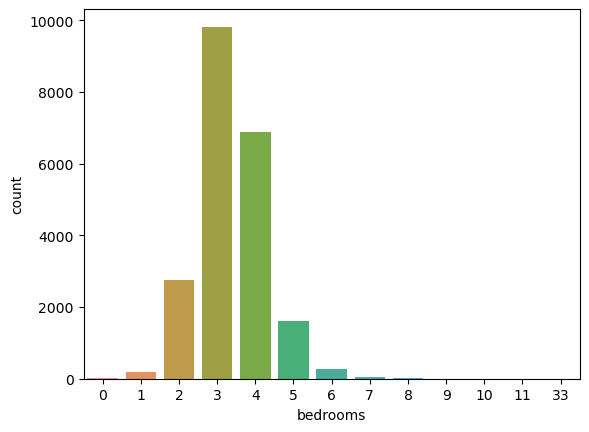

In [153]:
# Let's explore little more
sns.countplot(data=df, x='bedrooms')
#sns.countplot(data=df, x='bedrooms', order=sorted(df['bedrooms'].unique()))
plt.show()

In [154]:
#let's quick at look correlation
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [155]:
#let's look at how price is correlated with others
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We can see the price highly correlatedwith sqft_living!

<Axes: xlabel='price', ylabel='sqft_living'>

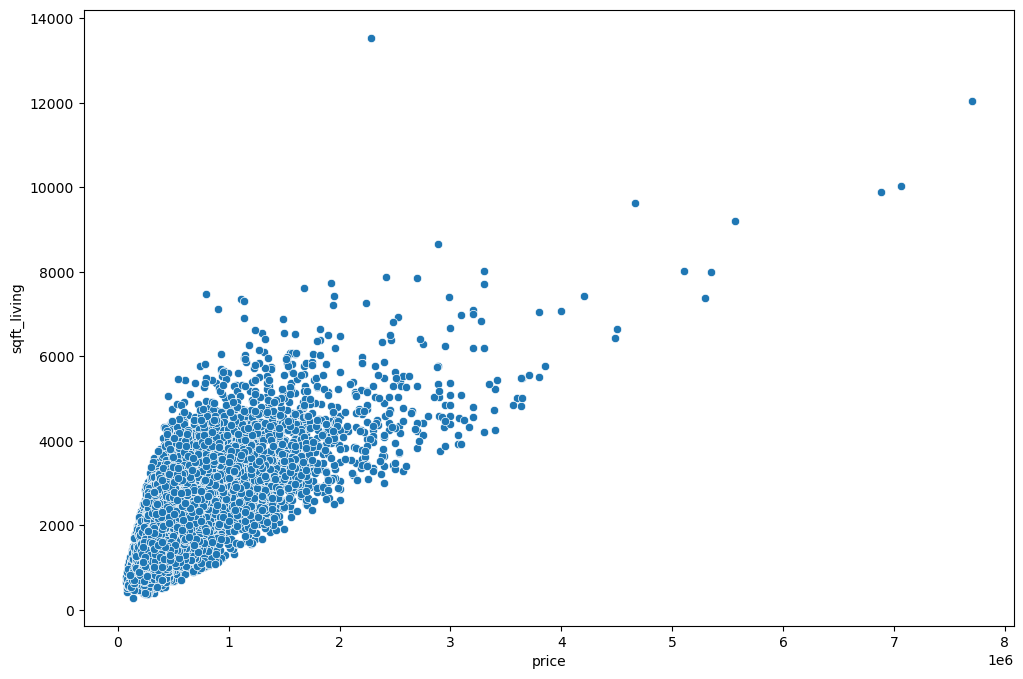

In [156]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Geographical Properties
Fun plots: There are some longitude and latitude information in the data. Let's explore a little bit!

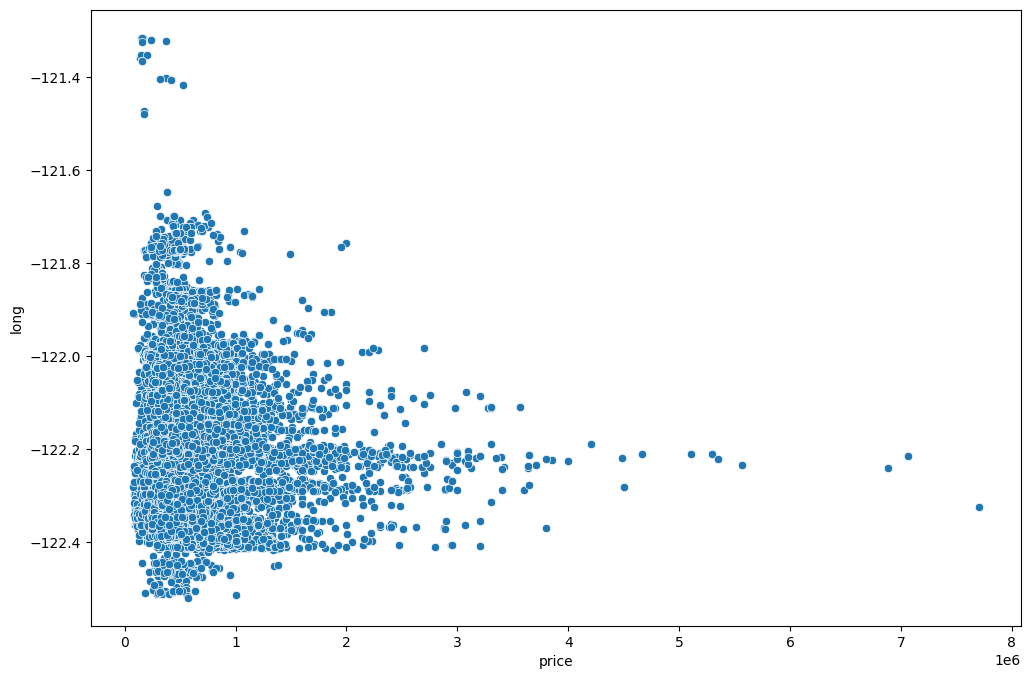

In [157]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
plt.show()

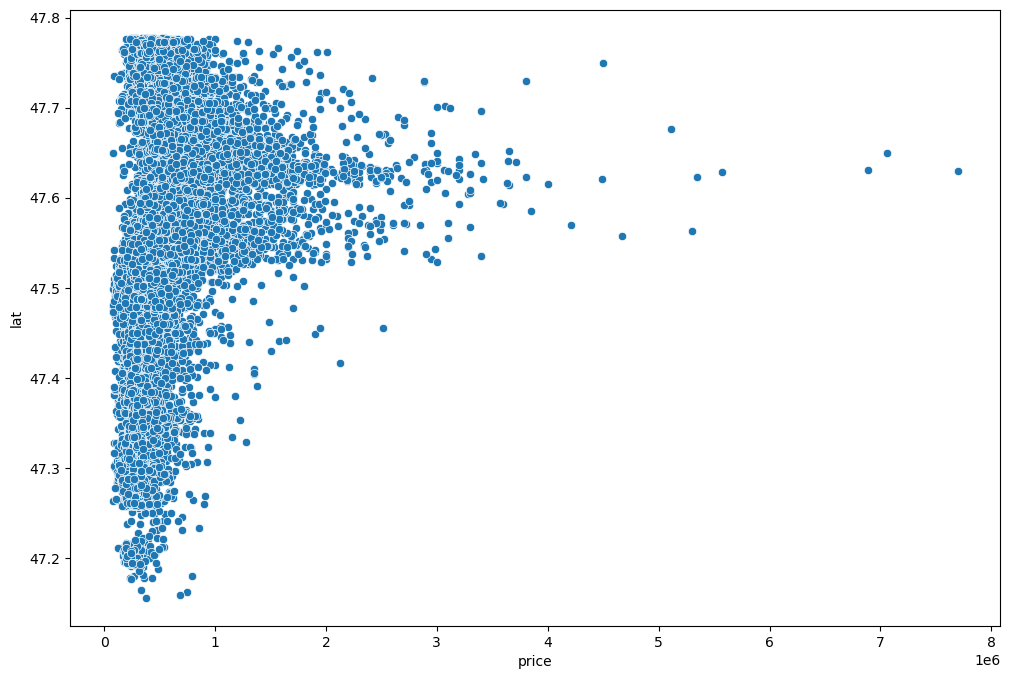

In [158]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
plt.show()

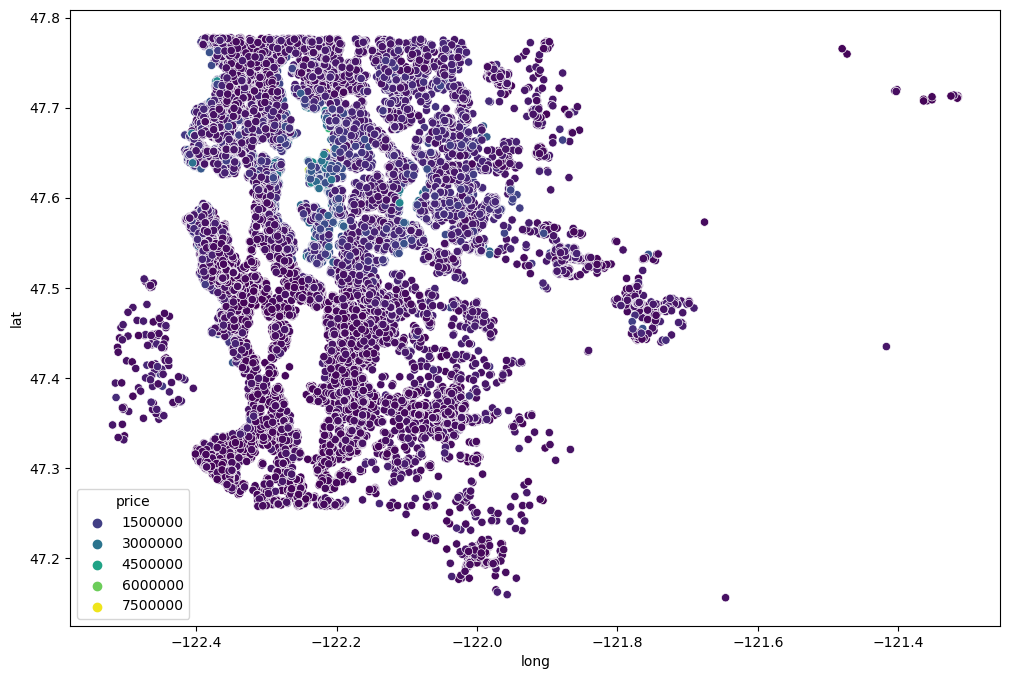

In [159]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', palette='viridis')
plt.show()


In [160]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [161]:
len(df)

21613

When examining the plot depicting the relationship between count and price, we observe that only a small fraction of houses exceed the $3 million price threshold. In fact, this accounts for approximately 1% of the total number of houses as indicated in the table above. As a result, it would be prudent to exclude this data from our analysis.

In [162]:
len(df)*(0.01)

216.13

In [163]:
# let's create a new data fmae for the bottom 99% of data
bottom_99_perc = df.sort_values('price',ascending=False).iloc[216:]

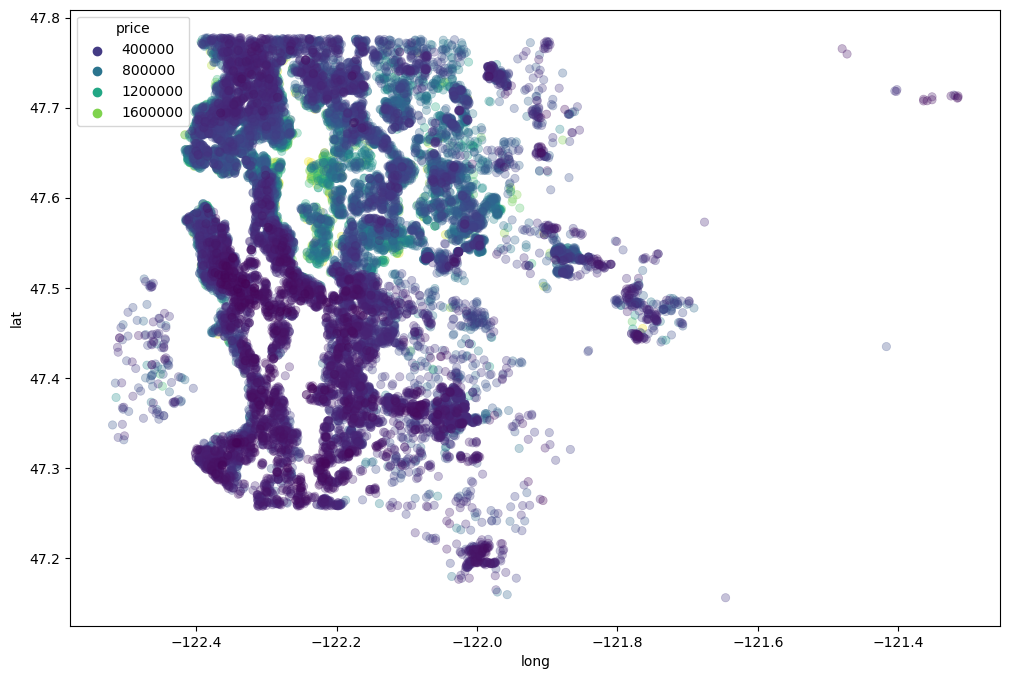

In [164]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=bottom_99_perc,hue='price',
                palette='viridis',edgecolor=None,alpha=0.3)
plt.show()

## Working with Feature Data

In [165]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [166]:
#df.info()

In [167]:
#Let's drop "id" column from our dataset as it does not contribute any significant information to our analysis.
df = df.drop('id',axis=1)

In [168]:
#df.head()

In [169]:
#df['date']

By looking at date column it's appears to be in string formate lets convert this in to datetime object.

In [170]:
# Convert the 'date_string' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [171]:
# Extract the year, month, and day components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [172]:
#df.head()

<Axes: xlabel='year', ylabel='price'>

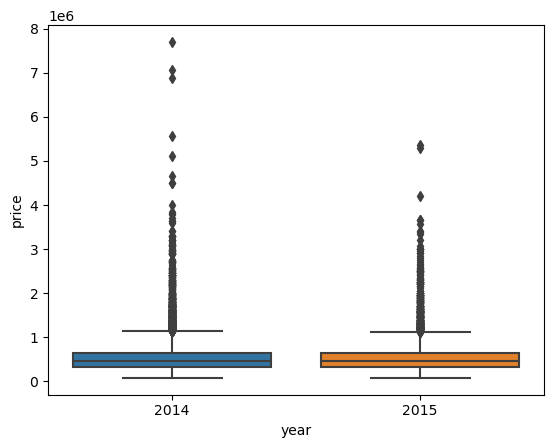

In [173]:
sns.boxplot(x='year',y='price',data=df)

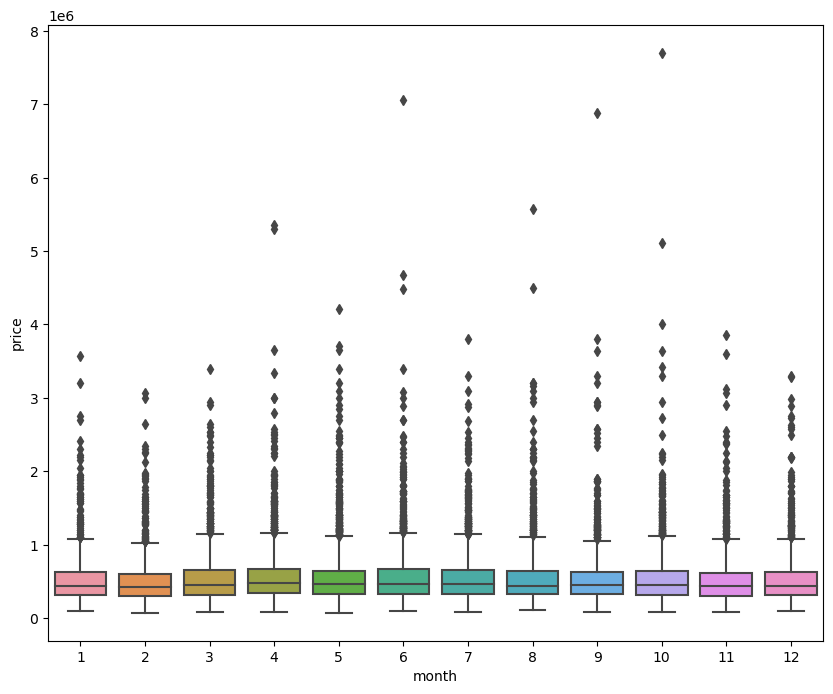

In [174]:
plt.figure(figsize=(10,8))
sns.boxplot(x='month',y='price',data=df)
plt.show()

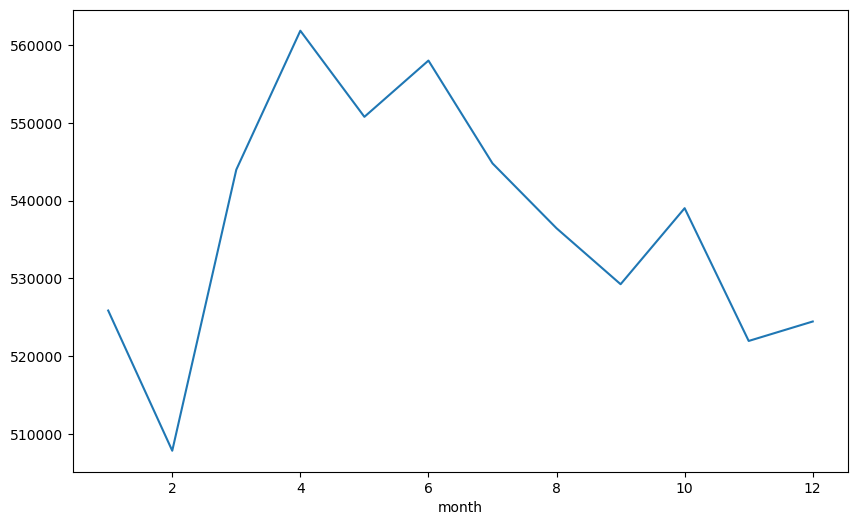

In [175]:
#Let's examine the average price by months
plt.figure(figsize=(10, 6))
monthly_average_price = df.groupby('month')['price'].mean().plot()

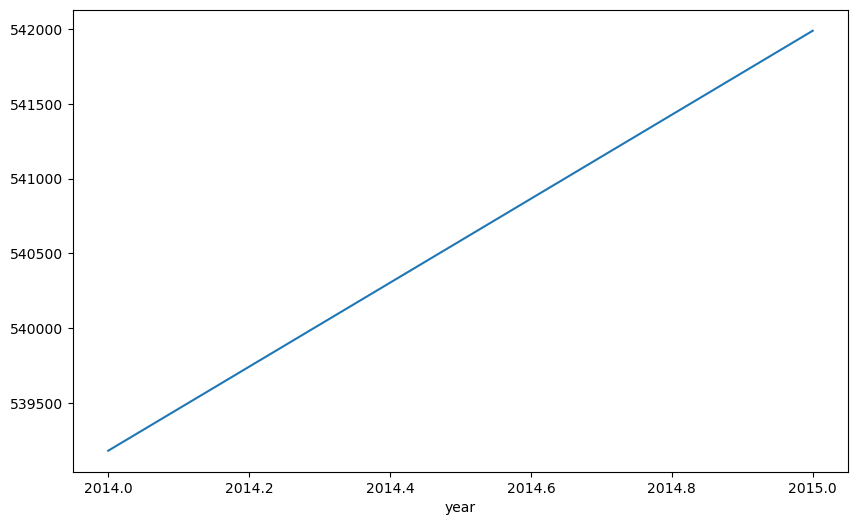

In [176]:
plt.figure(figsize=(10, 6))
monthly_average_price = df.groupby('year')['price'].mean().plot()

The "date" column serves no significant purpose for data analysis beyond facilitating feature analysis. Therefore, it is advisable to remove this column from the dataset as it does not contribute meaningful information to our analytical efforts.

In [177]:
df = df.drop('date',axis=1)

In [178]:
#df.head()

In [179]:
df = df.drop('zipcode',axis=1)

In [180]:
#df.head()

Likewise, we can opt to disregard the "zipcode" column due to its considerable 70 distinct categories, which may not offer substantial value for our analysis.

In [182]:
# It would be reasonable to consider this due to the scaling factor, 
# where a higher value should correlate with greater inherent value. 
# it just luck
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [183]:
# could make sense due to scaling, higher should correlate to more value, just lucky 
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [208]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [209]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [227]:
from sklearn.preprocessing import MinMaxScaler

In [228]:
scaler = MinMaxScaler()

In [229]:
X_train= scaler.fit_transform(X_train)

In [230]:
X_test = scaler.transform(X_test)

In [231]:
X_train.shape

(15129, 20)

In [232]:
X_test.shape

(6484, 20)

## Creating a Model

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [234]:
model = Sequential()

model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(21,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [260]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 958us/step - loss: 27633836032.0000 - val_loss: 27673317376.0000
Epoch 2/400
119/119 [==============================] - 0s 825us/step - loss: 27600539648.0000 - val_loss: 27633291264.0000
Epoch 3/400
119/119 [==============================] - 0s 837us/step - loss: 27606738944.0000 - val_loss: 27765966848.0000
Epoch 4/400
119/119 [==============================] - 0s 820us/step - loss: 27557179392.0000 - val_loss: 27688300544.0000
Epoch 5/400
119/119 [==============================] - 0s 826us/step - loss: 27635302400.0000 - val_loss: 27625699328.0000
Epoch 6/400
119/119 [==============================] - 0s 817us/step - loss: 27523483648.0000 - val_loss: 27614883840.0000
Epoch 7/400
119/119 [==============================] - 0s 820us/step - loss: 27559053312.0000 - val_loss: 27602743296.0000
Epoch 8/400
119/119 [==============================] - 0s 839us/step - loss: 27562948608.0000 - val_loss: 27793080320.0000
Epoch 9/400
119/

119/119 [==============================] - 0s 807us/step - loss: 26616082432.0000 - val_loss: 26983473152.0000
Epoch 68/400
119/119 [==============================] - 0s 800us/step - loss: 26584418304.0000 - val_loss: 26972028928.0000
Epoch 69/400
119/119 [==============================] - 0s 792us/step - loss: 26605832192.0000 - val_loss: 27005499392.0000
Epoch 70/400
119/119 [==============================] - 0s 778us/step - loss: 26537498624.0000 - val_loss: 27013439488.0000
Epoch 71/400
119/119 [==============================] - 0s 782us/step - loss: 26536046592.0000 - val_loss: 27073482752.0000
Epoch 72/400
119/119 [==============================] - 0s 786us/step - loss: 26472808448.0000 - val_loss: 27029811200.0000
Epoch 73/400
119/119 [==============================] - 0s 787us/step - loss: 26514941952.0000 - val_loss: 26944274432.0000
Epoch 74/400
119/119 [==============================] - 0s 797us/step - loss: 26488709120.0000 - val_loss: 26957684736.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 821us/step - loss: 25611237376.0000 - val_loss: 26549336064.0000
Epoch 134/400
119/119 [==============================] - 0s 795us/step - loss: 25628907520.0000 - val_loss: 26436380672.0000
Epoch 135/400
119/119 [==============================] - 0s 782us/step - loss: 25633056768.0000 - val_loss: 26451273728.0000
Epoch 136/400
119/119 [==============================] - 0s 812us/step - loss: 25647874048.0000 - val_loss: 26451927040.0000
Epoch 137/400
119/119 [==============================] - 0s 790us/step - loss: 25574156288.0000 - val_loss: 26548529152.0000
Epoch 138/400
119/119 [==============================] - 0s 780us/step - loss: 25661941760.0000 - val_loss: 26504398848.0000
Epoch 139/400
119/119 [==============================] - 0s 792us/step - loss: 25560926208.0000 - val_loss: 26447702016.0000
Epoch 140/400
119/119 [==============================] - 0s 789us/step - loss: 25526898688.0000 - val_loss: 26452639744.0000


119/119 [==============================] - 0s 846us/step - loss: 24313380864.0000 - val_loss: 25739866112.0000
Epoch 199/400
119/119 [==============================] - 0s 827us/step - loss: 24322770944.0000 - val_loss: 25760247808.0000
Epoch 200/400
119/119 [==============================] - 0s 805us/step - loss: 24255037440.0000 - val_loss: 25693941760.0000
Epoch 201/400
119/119 [==============================] - 0s 792us/step - loss: 24223721472.0000 - val_loss: 26000453632.0000
Epoch 202/400
119/119 [==============================] - 0s 786us/step - loss: 24217911296.0000 - val_loss: 25692129280.0000
Epoch 203/400
119/119 [==============================] - 0s 803us/step - loss: 24258979840.0000 - val_loss: 25704488960.0000
Epoch 204/400
119/119 [==============================] - 0s 800us/step - loss: 24205883392.0000 - val_loss: 25652989952.0000
Epoch 205/400
119/119 [==============================] - 0s 787us/step - loss: 24178974720.0000 - val_loss: 25651234816.0000
Epoch 206/400


119/119 [==============================] - 0s 796us/step - loss: 22316595200.0000 - val_loss: 24257245184.0000
Epoch 264/400
119/119 [==============================] - 0s 787us/step - loss: 22349838336.0000 - val_loss: 24136531968.0000
Epoch 265/400
119/119 [==============================] - 0s 789us/step - loss: 22252800000.0000 - val_loss: 24202115072.0000
Epoch 266/400
119/119 [==============================] - 0s 776us/step - loss: 22275981312.0000 - val_loss: 24112162816.0000
Epoch 267/400
119/119 [==============================] - 0s 794us/step - loss: 22194831360.0000 - val_loss: 24055584768.0000
Epoch 268/400
119/119 [==============================] - 0s 790us/step - loss: 22174056448.0000 - val_loss: 24013690880.0000
Epoch 269/400
119/119 [==============================] - 0s 772us/step - loss: 22139523072.0000 - val_loss: 23967197184.0000
Epoch 270/400
119/119 [==============================] - 0s 781us/step - loss: 22092890112.0000 - val_loss: 23971497984.0000
Epoch 271/400


119/119 [==============================] - 0s 807us/step - loss: 20305940480.0000 - val_loss: 23006552064.0000
Epoch 329/400
119/119 [==============================] - 0s 785us/step - loss: 20310593536.0000 - val_loss: 22828875776.0000
Epoch 330/400
119/119 [==============================] - 0s 775us/step - loss: 20289632256.0000 - val_loss: 22857408512.0000
Epoch 331/400
119/119 [==============================] - 0s 784us/step - loss: 20197826560.0000 - val_loss: 22818525184.0000
Epoch 332/400
119/119 [==============================] - 0s 785us/step - loss: 20187346944.0000 - val_loss: 22810040320.0000
Epoch 333/400
119/119 [==============================] - 0s 790us/step - loss: 20169510912.0000 - val_loss: 22807021568.0000
Epoch 334/400
119/119 [==============================] - 0s 783us/step - loss: 20100538368.0000 - val_loss: 22717007872.0000
Epoch 335/400
119/119 [==============================] - 0s 780us/step - loss: 20124434432.0000 - val_loss: 22747518976.0000
Epoch 336/400


119/119 [==============================] - 0s 783us/step - loss: 18964940800.0000 - val_loss: 21927102464.0000
Epoch 394/400
119/119 [==============================] - 0s 799us/step - loss: 18953082880.0000 - val_loss: 22068639744.0000
Epoch 395/400
119/119 [==============================] - 0s 771us/step - loss: 18902771712.0000 - val_loss: 21879062528.0000
Epoch 396/400
119/119 [==============================] - 0s 786us/step - loss: 18835609600.0000 - val_loss: 21918390272.0000
Epoch 397/400
119/119 [==============================] - 0s 788us/step - loss: 18882301952.0000 - val_loss: 22002274304.0000
Epoch 398/400
119/119 [==============================] - 0s 788us/step - loss: 18853124096.0000 - val_loss: 21876494336.0000
Epoch 399/400
119/119 [==============================] - 0s 782us/step - loss: 18852186112.0000 - val_loss: 21910611968.0000
Epoch 400/400
119/119 [==============================] - 0s 776us/step - loss: 18781231104.0000 - val_loss: 21758445568.0000


In [261]:
losses = pd.DataFrame(model.history.history)

<Axes: >

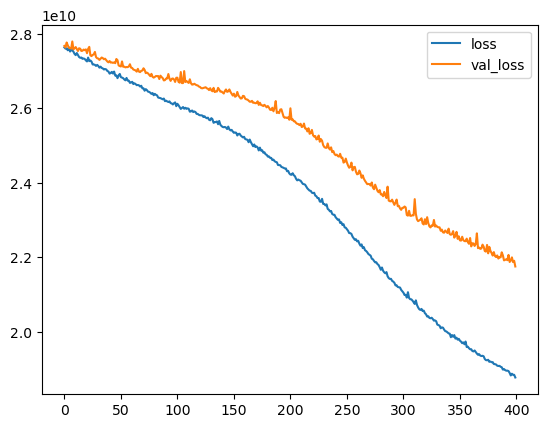

In [262]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [263]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [264]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 274us/step


In [265]:
np.sqrt(mean_squared_error(y_test,predictions))

147507.4490529787

In [266]:
mean_absolute_error(y_test,predictions)

82845.98066876156

In [267]:
df['price'].mean()

540088.1417665294

In [268]:
df['price'].median()

450000.0

In [269]:
explained_variance_score(y_test,predictions)

0.8448992169635839

mearly OK!

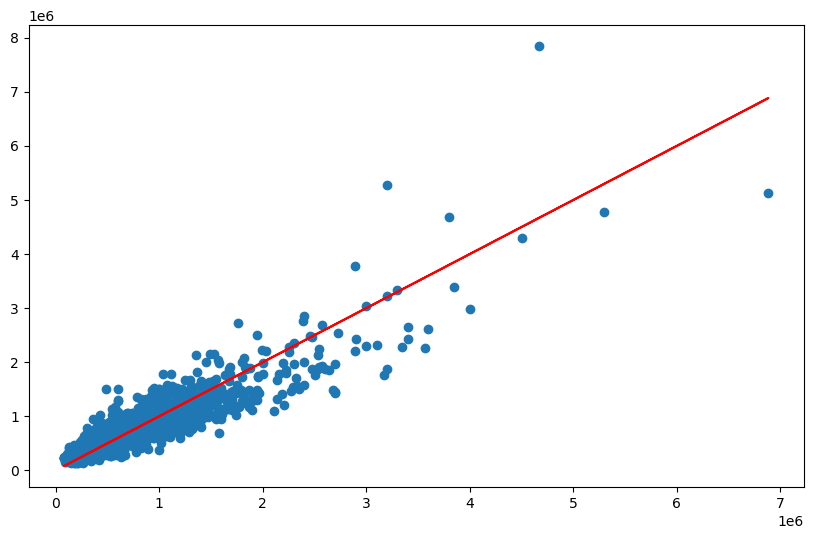

In [270]:
plt.figure(figsize=(10,6))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.show()

 Our predictive accuracy is diminished when it comes to estimating the prices of the most expensive houses. This is to be expected since we have eliminated outliers, which include the prices of these exceptionally high-value properties.

In [272]:
errors = y_test.reshape(6484, 1) - predictions

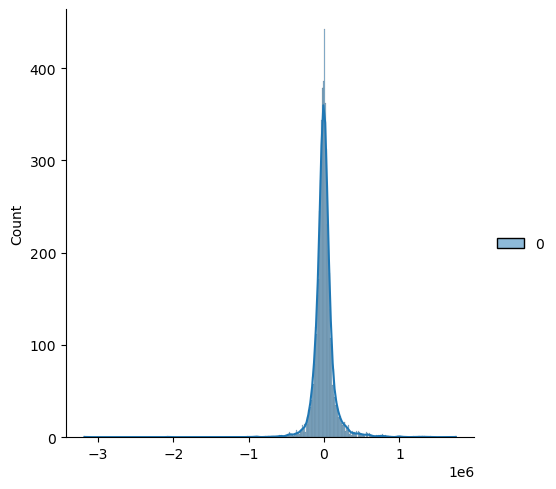

In [275]:
sns.displot(errors, kde=True)
plt.show()

-------------
### Predicting on a brand new house

In [276]:
single_house = df.drop('price',axis=1).iloc[0]

In [283]:
single_house = scaler.transform(single_house.values.reshape(-1, 20))

In [284]:
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00573322, 0.        , 0.81818182, 0.4       ]])

In [287]:
model.predict(single_house)

1/1 [==============================] - 0s 10ms/step


array([[282571.78]], dtype=float32)

In [288]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13


The actual price for the property is 221900 while our model predicted a higher value of 282572. This suggests that our model appears to be overestimating prices, possibly because it's attempting to accommodate extreme values. An intriguing next step would be to retrain the model after excluding the top 1% or 2% of values, with the goal of potentially reducing the mean square error.